# Analyzing NYTbd Sample 2
<br>
This notebook is looking at the NYTbd Sample 2 content analyzed by ACCENT and PETRARCH2 to identify current limitations with PETRARCH2 and to try and devise solutions. 

In [9]:
# Setup Environment
from nltk.parse.corenlp import CoreNLPServer
from nltk.parse.corenlp import CoreNLPDependencyParser
from nltk.parse import CoreNLPParser

import pandas as pd

import pprint
import nltk

from nltk.tree import *
from IPython.display import display

import io, os, sys, types

from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell

#### Link to Java Server for Standford CoreNLP
<br>
java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -annotators "tokenize,ssplit,pos,lemma,parse,sentiment" -port 9000 -timeout 30000

In [63]:
# Connect to Server
parser = CoreNLPParser('http://localhost:9000')
depr = CoreNLPDependencyParser('http://localhost:9000')

#### Write Some Functions for Parsing Text

In [11]:
# Core Parser- save as df['parsed']
def core_parser(df, col):
    parse = []
    i = ""
    for i in range(len(df)):
        parse.append(i)
        parse[i] = next(parser.raw_parse(df[col].iloc[i]))
    return parse

# Dependency Parser- save as df['dep']
def dep_parser(df, col):
    dep = []
    i = ""
    for i in range(len(df)):
        dep.append(i)
        dep[i] = next(depr.raw_parse(df[col].iloc[i]))
    return dep

# For easy display of both parse trees, text, and code
def easy_read(corp, index_num):
    display(corp['parsed'].iloc[index_num])
    display(corp['dep'].iloc[index_num])
    display("Text = " + corp.iloc[index_num].loc['text'])
    display("Code = " + str(corp.iloc[index_num].loc['code']))

## Import Data

In [44]:
petrarch2 = pd.read_csv("/Volumes/Cline/projects/PartTime/Jonathan Bonaguro - Spring 2020/NYTbd sample 2 14 18/combined_output_2-24_11-13-11.txt", sep='\t')
accent2 = pd.read_csv("/Volumes/Cline/projects/PartTime/Jonathan Bonaguro - Spring 2020/NYTbd sample 2 14 18/ACCENT output NYTbd 14 18 sample 2.csv")
petrarch2.drop('Unnamed: 0', axis=1, inplace=True)

## Let's Start with Root Code 18

In [54]:
petrarch2_root18 = petrarch2[petrarch2.root_code == 18]
accent2_root18 = accent2[accent2.root_code == 18]

In [64]:
%time petrarch2_root18['parsed'] = core_parser(petrarch2_root18, 'text')
petrarch2_root18['dep'] = dep_parser(petrarch2_root18, 'text')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


CPU times: user 193 ms, sys: 316 ms, total: 509 ms
Wall time: 19.8 s


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [66]:
%time accent2_root18['parsed'] = core_parser(accent2_root18, 'text')
accent2_root18['dep'] = dep_parser(accent2_root18, 'text')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


CPU times: user 372 ms, sys: 246 ms, total: 618 ms
Wall time: 2min 26s


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Articles where PETRARCH and ACCENT ***did not*** find the same event

In [77]:
# Index on 'aid' and 'code' 
keys = list(['aid', 'code'])
accent2_root18_index = accent2_root18.set_index(keys).index
petrarch2_root18_index = petrarch2_root18.set_index(keys).index

# Produce df's of mutually exclusive events 
accent2_root18_only = accent2_root18[~accent2_root18_index.isin(petrarch2_root18_index)]
petrarch2_root18_only = petrarch2_root18[~petrarch2_root18_index.isin(accent2_root18_index)]

### Articles where PETRARCH and ACCENT found ***different*** events

In [83]:
## Index only on AID
keys = list(['aid'])
accent2_root18_index1 = accent2_root18.set_index(keys).index
petrarch2_root18_index1 = petrarch2_root18.set_index(keys).index

## df of same articles coded by each event code
accent2_root18_sameAID = accent2_root18[accent2_root18_index1.isin(petrarch2_root18_index1)]
petrarch2_root18_sameAID = petrarch2_root18[petrarch2_root18_index1.isin(accent2_root18_index1)]

## index dfs of same articles on AID and event code
accent2_root18_sameAID_index = accent2_root18_sameAID.set_index(keys).index
petrarch2_root18_sameAID_index = petrarch2_root18_sameAID.set_index(keys).index

## create df's of different codings in same event
accent2_root18_diffCODE = accent2_root18_sameAID[accent2_root18_sameAID_index.isin(petrarch2_root18_sameAID_index)]
petrarch2_root18_diffCODE = petrarch2_root18_sameAID[petrarch2_root18_sameAID_index.isin(accent2_root18_sameAID_index)]

In [94]:
petrarch2_root18_diffCODE = petrarch2_root18_diffCODE.sort_values('aid').reset_index(drop = True)

In [95]:
accent2_root18_diffCODE = accent2_root18_diffCODE.sort_values('aid').reset_index(drop = True)

In [91]:
def quick_aid_check(corp1, corp2, index1, index2):
    print(corp1['aid'].iloc[index1])
    print(corp2['aid'].iloc[index2])

In [96]:
quick_aid_check(petrarch2_root18_diffCODE, accent2_root18_diffCODE, 0, 0)

22342995
22342995


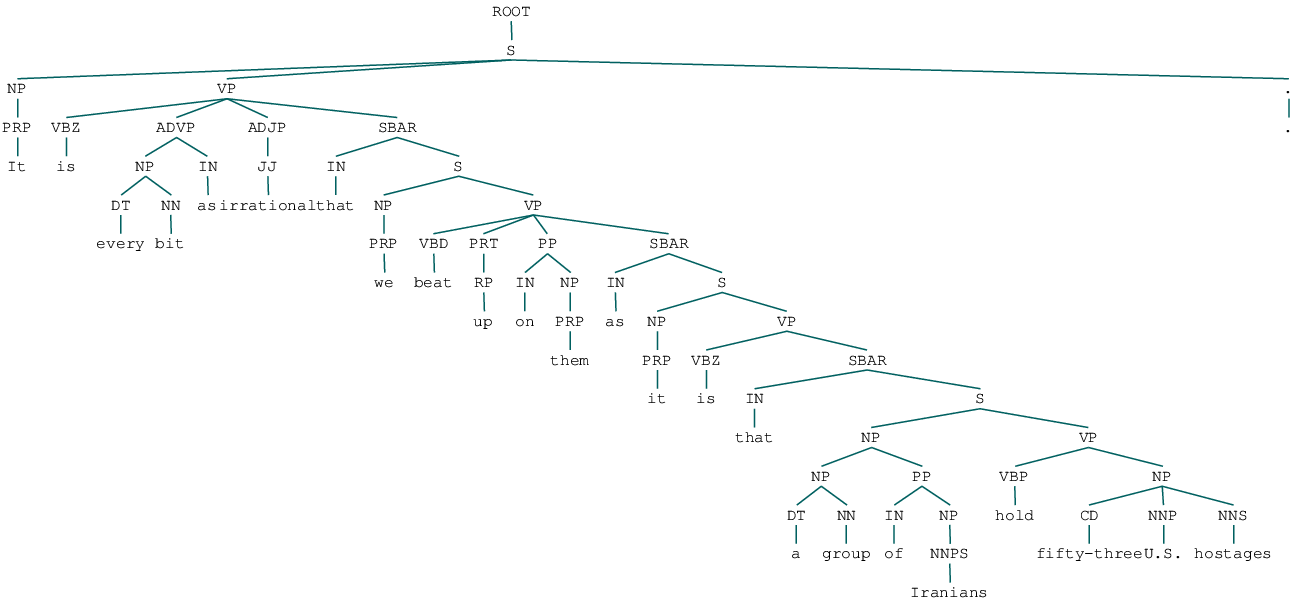

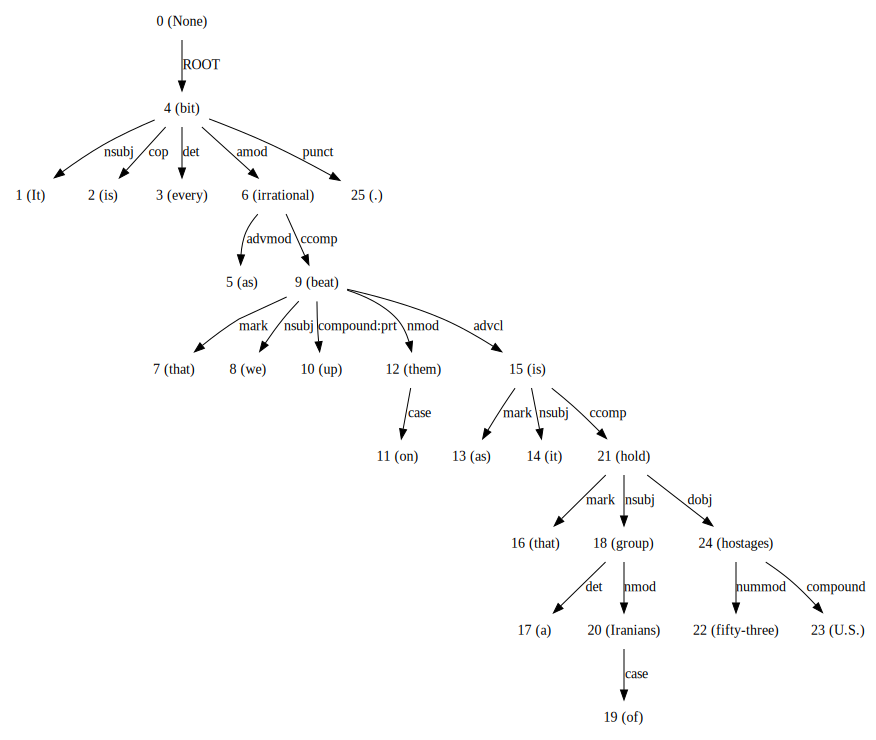

'Text = It is every bit as irrational that we beat up on them as it is that a group of Iranians hold fifty-three U.S. hostages.'

'Code = 181'

In [97]:
easy_read(accent2_root18_diffCODE, 0)

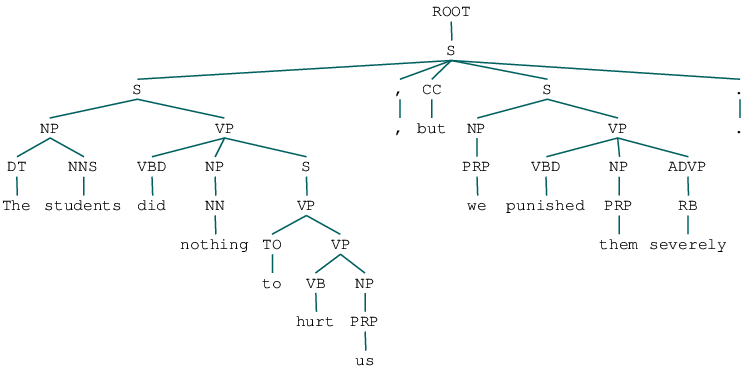

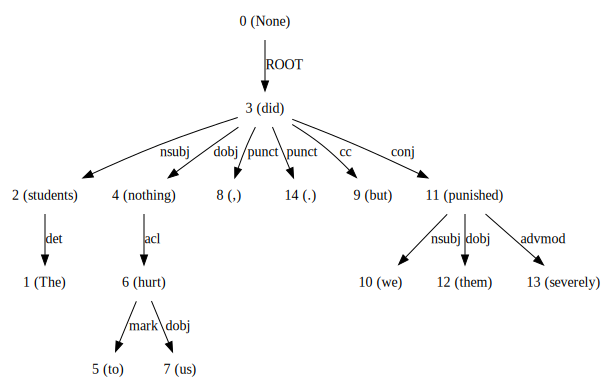

'Text = The students did nothing to hurt us , but we punished them severely .'

'Code = 180'

In [98]:
easy_read(petrarch2_root18_diffCODE, 0)